# Phase 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research questions

- Does the number of reviews indicate an app's popularity? People could leave reviews for both good and bad user experiences.
- How related are an app's number of installations and rating? I've seen campaigns where, if you download a game, you earn a small reward on a messaging app (Line). I don't think there are a lot of similar situations, but it could be worth checking.
- Does any specific category tend to be more popular than others?
- Does any category tend to be more expensive?
- How does having a more recent update correlate with ratings or number of installs?
- Does a higher price result in lower installs?

## Data collection and cleaning

See data_cleaning.ipynb

## Data description

The dataset contains information on apps in the Google Play Store as of August 2018. Each row is an entry for one app, and there are 12 columns, shown below.  
- The 'app' column contains the apps' names.
- 'category' is the category an app belongs to. One app only belongs to one category, as opposed to 'genres', of which each app can have multiple.
- 'rating' is the rating out of 5.
- 'reviews' is the number of user reviews.
- 'size' is the size of the app.
- 'installs' is the approximate number of times an app was installed. For example, 500000 means that an app was downloaded more than 500,000 times.
- 'last_updated' is the last time an app was updated.
- 'current_ver' is the most current version of an app.
- 'android_ver' is the oldest Android version an app can run on.

In [2]:
playstore = pd.read_csv('playstore_data.csv', parse_dates = ['last_updated'], infer_datetime_format = True)
playstore.head()

,app,category,rating,reviews,size,installs,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19M,10000,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,art_and_design,3.9,967,14M,500000,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7M,5000000,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25M,50000000,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8M,100000,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


Kaggle user Lavanya Gupta created this dataset by scraping the Google Play Store. Presumably, the data collection occurred on or around August 8, 2018, since this date is the latest in the 'last_updated' column. Gupta writes that she could not find publicly available data on the Google Play Store, while there were many datasets on the Apple App Store. Upon looking into this issue, she found that the Google Play Store uses "sophisticated modern-day techniques (like dynamic page load) using JQuery", which makes scraping more difficult. About potential uses for her dataset, she writes that "\[a\]ctionable insights can be drawn for developers to work on and capture the Android market".

After downloading this dataset, I converted some of the columns to types that would be easier to use for calculating, for example, changing the number of reviews to integer values and changing 'last_updated' to datetime values. I discovered that some rows were duplicate entries and had to remove them. I also removed a column, 'type', which identified whether apps were free, because the 'price' column could serve this function as well.

Some information, such as the precise number of downloads, could not be collected through scraping because the Play Store does not list them. This dataset is a subset of all possible instances; there are 9660 rows (apps) while there were millions of apps in the Google Play Store even in 2018. The criteria for being collected into this dataset is unclear. The original dataset can be found at https://www.kaggle.com/lava18/google-play-store-apps.

## Data limitations

- As the data was scraped in early August of 2018, it isn't the most recent. The dataset also does not contain all possible instances.
- There is no column for the date when an app was first released although this information is listed in the Play Store. As a result, the columns 'last_updated' and 'current_ver' lose some context.
- There were multiple entries with the same name in the 'app' column, and some were listed with different categories and different numbers of reviews. I removed these duplicate rows, which may have affected the data.
- The 'price' column might not account for in-app purchase costs because the app is listed as free in the Play Store.
- The 'rating' column is missing 15% of its values.
- The values in 'installs' are threshold indicators, not the actual values, which aren't displayed in the Play Store.

## Exploratory data analysis

### Single variables

#### 1. Look at what categories there are

In [3]:
playstore['category'].describe()

count       9660
unique        33
top       family
freq        1832
Name: category, dtype: object

In [4]:
playstore['category'].value_counts()

family                 1832
game                    959
tools                   827
business                420
medical                 395
personalization         376
productivity            374
lifestyle               370
finance                 345
sports                  325
communication           315
health_and_fitness      288
photography             281
news_and_magazines      254
social                  239
books_and_reference     222
travel_and_local        219
shopping                202
dating                  171
video_players           163
maps_and_navigation     131
education               119
food_and_drink          112
entertainment           102
auto_and_vehicles        85
libraries_and_demo       84
weather                  79
house_and_home           74
events                   64
art_and_design           64
parenting                60
comics                   56
beauty                   53
Name: category, dtype: int64

There's a surprisingly high number of family apps, more than the next two biggest categories combined. After game and tool apps, there is another gap of about 400 until the next biggest category, business.

#### 2. Look at the distribution of number of installs

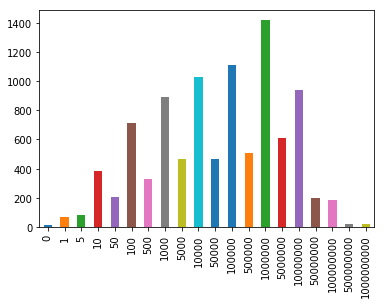

In [5]:
playstore['installs'].value_counts().sort_index().plot(kind = 'bar')

This distribution looks weird because of the alternating tall and short bars, but it could be because of the way bins are determined. For example, if 10-100 installs was one bin and 100-1000 installs was another, the plot would probably show a clearer upward trend that drops sharply after 10 million installs.

#### 3. The 'rating' column

In [6]:
rating_min = playstore['rating'].min()
rating_max = playstore['rating'].max()
rating_mean = playstore['rating'].mean()
rating_std = playstore['rating'].std()
print('rating\nminimum: {:.1f}\nmaximum: {:.1f}\nmean: {:.2f}\nstandard deviation: {:.2f}'.format(rating_min, rating_max, rating_mean, rating_std))

rating
minimum: 1.0
maximum: 5.0
mean: 4.17
standard deviation: 0.54


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


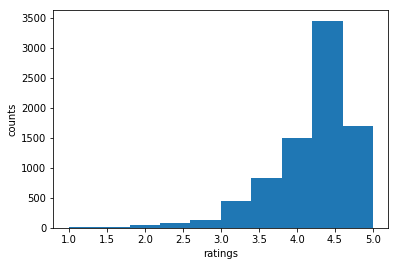

In [7]:
plt.hist(playstore['rating'], range = (1.0, 5.0))
plt.xlabel('ratings')
plt.ylabel('counts')
plt.show()

The mean rating is fairly high and the standard deviation not too large. From the histogram, the distribution is very left-skewed.

#### 4. The 'reviews' column

In [8]:
review_min = playstore['reviews'].min()
review_max = playstore['reviews'].max()
review_mean = playstore['reviews'].mean()
review_median = playstore['reviews'].median()
print('reviews\nminimum: {}\nmaximum: {}\nmean: {:.2f}\nmedian: {}'.format(review_min, review_max, review_mean, review_median))

reviews
minimum: 0
maximum: 78158306
mean: 216570.14
median: 967.0


The mean and median are very far apart, perhaps indicating that a small number of apps have a disproportionately large number of reviews.

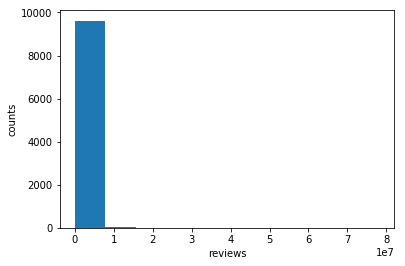

In [9]:
plt.hist(playstore['reviews'])
plt.xlabel('reviews')
plt.ylabel('counts')
plt.show()

In [10]:
len(playstore[playstore['reviews'] < 1000])

4855

An initial histogram shows that the majority of apps have less than 8 million reviews (which is still a lot), and about half have less than 1000 reviews.

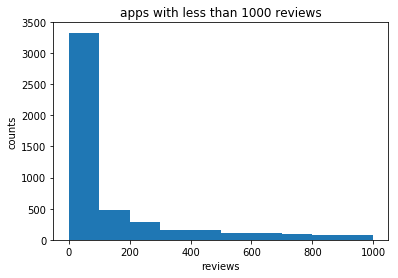

In [11]:
plt.hist(playstore[playstore['reviews'] < 1000]['reviews'])
plt.xlabel('reviews')
plt.ylabel('counts')
plt.title('apps with less than 1000 reviews')
plt.show()

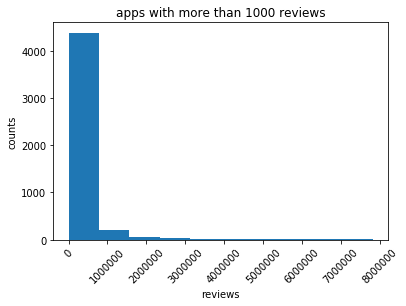

In [13]:
plt.hist(playstore[(playstore['reviews'] > 1000) & (playstore['reviews'] < 8000000)]['reviews'])
plt.xlabel('reviews')
plt.ylabel('counts')
plt.xticks(rotation = 45)
plt.title('apps with more than 1000 reviews')
plt.show()

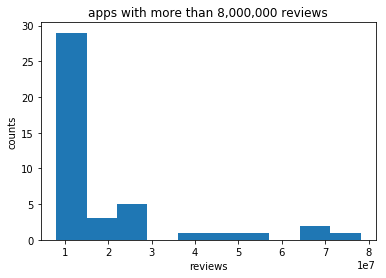

In [14]:
plt.hist(playstore[playstore['reviews'] > 8000000]['reviews'])
plt.xlabel('reviews')
plt.ylabel('counts')
plt.title('apps with more than 8,000,000 reviews')
plt.show()

It appears that about half of the apps have less than 1000 reviews, the other half have 1000 to one or two million, and a few have more than 8 million reviews.

#### 5. Dates in 'last_updated'

last_updated
earliest: 2010-05-21 00:00:00
latest: 2018-08-08 00:00:00


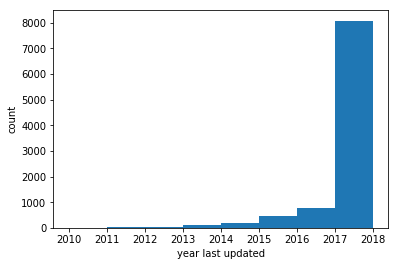

In [15]:
updated_earliest = playstore['last_updated'].min()
updated_latest = playstore['last_updated'].max()
print('last_updated\nearliest: {}\nlatest: {}'.format(updated_earliest, updated_latest))
plt.hist(playstore['last_updated'].dt.year, bins = 8)
plt.xlabel('year last updated')
plt.ylabel('count')
plt.show()

Some apps hadn't been updated since 2010, but the majority were last updated in 2018, which makes sense.

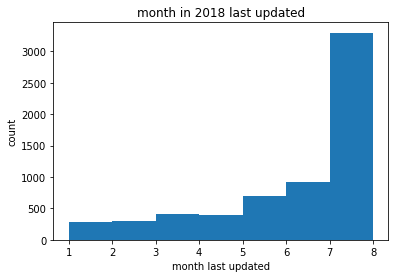

In [16]:
plt.hist(playstore[playstore['last_updated'].dt.year == 2018]['last_updated'].dt.month, bins = 7)
plt.xlabel('month last updated')
plt.ylabel('count')
plt.title('month in 2018 last updated')
plt.show()

The data collection took place around August 8, so it's interesting that within a week or so of the beginning of August 2018, a third of the apps had already been updated.

### Two variables

#### 1. rating vs installs

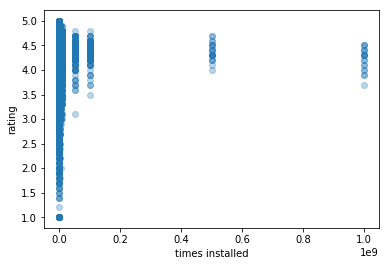

In [18]:
plt.scatter(playstore['installs'], playstore['rating'], alpha = 0.3)
plt.xlabel('times installed')
plt.ylabel('rating')
plt.show()

Apps with less installs tend to have a wider range of ratings, while apps that are installed more are mostly rated above 3.5.

#### 2. price vs installs

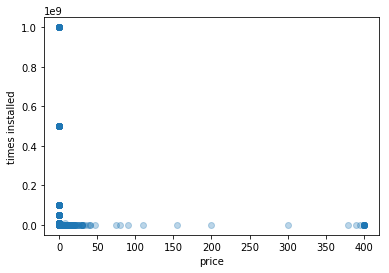

In [19]:
plt.scatter(playstore['price'], playstore['installs'], alpha = 0.3)
plt.xlabel('price')
plt.ylabel('times installed')
plt.show()

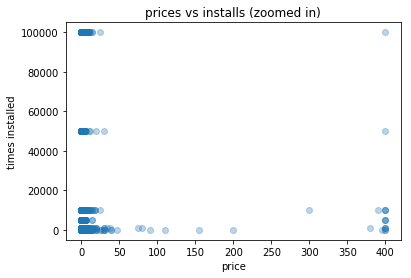

In [20]:
temp = playstore[playstore['installs'] <= 100000]
plt.scatter(temp['price'], temp['installs'], alpha = 0.3)
plt.xlabel('price')
plt.ylabel('times installed')
plt.title('prices vs installs (zoomed in)')
plt.show()

At lower price ranges (less than \$50), the price doesn't really affect the number of installs. From about \$50 to \$350, the number of installs is consistently low. At around \$400, the number of installs is still low, but there is more variation, and one app even had 100,000+ downloads.

#### 3. rating vs reviews

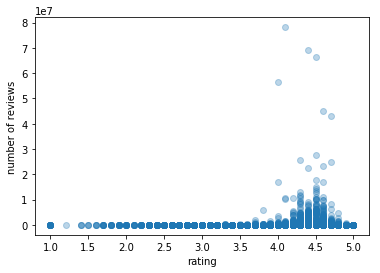

In [21]:
plt.scatter(playstore['rating'], playstore['reviews'], alpha = 0.3)
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.show()

It seems that apps with enormous numbers of reviews fall in the range of 4 to 4.7 stars. In general, that range of ratings corresponds to an increase in reviews.

#### 4. rating grouped by category

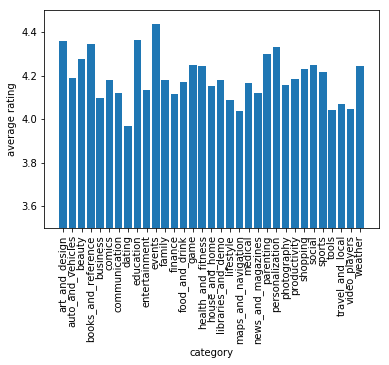

In [22]:
temp = playstore.groupby(by = 'category')['rating'].mean()
plt.bar(temp.index, temp.values)
plt.ylim((3.5, 4.5))
plt.xticks(rotation = 90)
plt.xlabel('category')
plt.ylabel('average rating')
plt.show()

In [23]:
temp

category
art_and_design         4.357377
auto_and_vehicles      4.190411
beauty                 4.278571
books_and_reference    4.344970
business               4.098479
comics                 4.181481
communication          4.121484
dating                 3.970149
education              4.364407
entertainment          4.135294
events                 4.435556
family                 4.179664
finance                4.115563
food_and_drink         4.172340
game                   4.247368
health_and_fitness     4.243033
house_and_home         4.150000
libraries_and_demo     4.178125
lifestyle              4.086093
maps_and_navigation    4.036441
medical                4.166552
news_and_magazines     4.121569
parenting              4.300000
personalization        4.332215
photography            4.157414
productivity           4.183389
shopping               4.230000
social                 4.247291
sports                 4.216154
tools                  4.039554
travel_and_local       4.069519

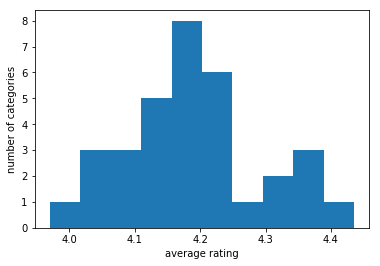

In [24]:
plt.hist(playstore.groupby(by = 'category')['rating'].mean())
plt.xlabel('average rating')
plt.ylabel('number of categories')
plt.show()

The average ratings for each category aren't that far apart, ranging from 3.9 (dating apps) to 4.44 (events apps). About half of the categories have average ratings of about 4.15 to 4.25.

## Questions

- Suggestions on what to do with the missing rating values? I don't want to remove them because that's a substantial amount of data, and the other columns don't have nearly as many NaN values. I'm thinking about replacing them with 3's because it's in the middle of the 5-star scale, though that would for sure skew the data.
- When I tried using plt.bar to plot the distribution for installs, an empty graph shows up (below). I've tried specifying a width value and converting installs_counts.index to a list, but nothing really worked.
- Are there any resources besides the matplotlib documentation (because I find it confusing, especially compared to other documentations) for learning how to use pyplot?
- Is there another plot type that could work for visualizing rating vs installs or price vs installs? The current scatterplots don't look so good.
- How do you plot last_updated with other variables? When I tried to plot it with rating, it either took a long time and looked like a mess, or just raised an error. Would plotting it by month or year help?
- I'm not sure whether to delete some columns (e.g. app size, genre, and versions) because I don't know if they'll be useful for anything. Size and app version in particular have values like 'Varies with device', which is harder to deal with.

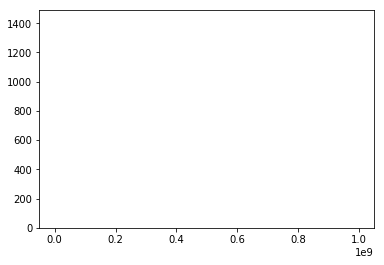

In [25]:
# what happened when I tried to use plt.bar
installs_counts = playstore['installs'].value_counts().sort_index()
plt.bar(installs_counts.index, installs_counts.values)
plt.show()